# A simple Python Notebook for Exploratory Analysis
I want to know if there is increasing rate of young people participating in voting for election. For the ones that participated, what is their background and demography. The ultimate question we want to solve for is, how can we contract more young people to participate in elections. 

In [1]:
pip install pyreadstat

In [2]:
# for data processing
import numpy as np
import pandas as pd

# for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})
sns.set_context("talk")
sns.set_theme(style='ticks')
sns.set_palette('magma')

In [3]:
dataset = pd.read_spss('/content/anes_timeseries_cdf.sav')
dataset.head()

,Version,VCF0004,VCF0006,VCF0006a,VCF0009x,VCF0010x,VCF0011x,VCF0009y,VCF0010y,VCF0011y,VCF0009z,VCF0010z,VCF0011z,VCF0012,VCF0013,VCF0014,VCF0015a,VCF0015b,VCF0016,VCF0017,VCF0018a,VCF0018b,VCF0019,VCF0050a,VCF0050b,VCF0070a,VCF0070b,VCF0071a,VCF0071b,VCF0071c,VCF0071d,VCF0072a,VCF0072b,VCF0101,VCF0102,VCF0103,VCF0104,VCF0105a,VCF0105b,VCF0106,...,VCF9242,VCF9243,VCF9244,VCF9245,VCF9246,VCF9247,VCF9248,VCF9249,VCF9250,VCF9251,VCF9252,VCF9253,VCF9254,VCF9255,VCF9256,VCF9257,VCF9258,VCF9259,VCF9260,VCF9261,VCF9262,VCF9263,VCF9264,VCF9265,VCF9266,VCF9267,VCF9268,VCF9269,VCF9270,VCF9271,VCF9272,VCF9273,VCF9274,VCF9275,VCF9277,VCF9278,VCF9279,VCF9280,VCF9281,VCF9282
0,ANES_CDF_VERSION:2019-Sep-10,1948.0,1001.0,19481001.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1. Post-election interview data present,1. Pre-election interview data present,0. Pre IW not abbreviated [1992:'Long' form Pre],0. Post IW is not abbreviated,0. Fresh Cross case,0. All personal,"0. IW conducted entirely in English; 2008,2012...","0. IW conducted entirely in English; 2008,2012...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3. 35 - 44,7. 1895 - 1910,1. Male,1. White non-Hispanic (1948-2012),1. White non-Hispanic,1. White non-Hispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ANES_CDF_VERSION:2019-Sep-10,1948.0,1002.0,19481002.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1. Post-election interview data present,1. Pre-election interview data present,0. Pre IW not abbreviated [1992:'Long' form Pre],0. Post IW is not abbreviated,0. Fresh Cross case,0. All personal,"0. IW conducted entirely in English; 2008,2012...","0. IW conducted entirely in English; 2008,2012...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3. 35 - 44,7. 1895 - 1910,2. Female,1. White non-Hispanic (1948-2012),1. White non-Hispanic,1. White non-Hispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANES_CDF_VERSION:2019-Sep-10,1948.0,1003.0,19481003.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1. Post-election interview data present,1. Pre-election interview data present,0. Pre IW not abbreviated [1992:'Long' form Pre],0. Post IW is not abbreviated,0. Fresh Cross case,0. All personal,"0. IW conducted entirely in English; 2008,2012...","0. IW conducted entirely in English; 2008,2012...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2. 25 - 34,6. 1911 - 1926,2. Female,1. White non-Hispanic (1948-2012),1. White non-Hispanic,1. White non-Hispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANES_CDF_VERSION:2019-Sep-10,1948.0,1004.0,19481004.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1. Post-election interview data present,1. Pre-election interview data present,0. Pre IW not abbreviated [1992:'Long' form Pre],0. Post IW is not abbreviated,0. Fresh Cross case,0. All personal,"0. IW conducted entirely in English; 2008,2012...","0. IW conducted entirely in English; 2008,2012...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3. 35 - 44,7. 1895 - 1910,2. Female,1. White non-Hispanic (1948-2012),1. White non-Hispanic,1. White non-Hispanic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANES_CDF_VERSION:2019-Sep-10,1948.0,1005.0,19481005.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1. Post-election interview data present,1. Pre-election interview data present,0. Pre IW not abbreviated [1992:'Long' form Pre],0. Post IW is not abbreviated,0. Fresh Cross case,0. All personal,"0. IW conducted entirely in English; 2008,2012...","0. IW conducted entirely in English; 2008,2012...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2. 25 - 3

Let's look at some basic summaries of the dataset. The dataset has 1029 variables and a total of 59,944 records.

In [4]:
dataset.shape

(59944, 1029)

In [5]:
# convert the varibale "VCF0004" into integers
dataset['VCF0004'] = dataset['VCF0004'].astype(int)

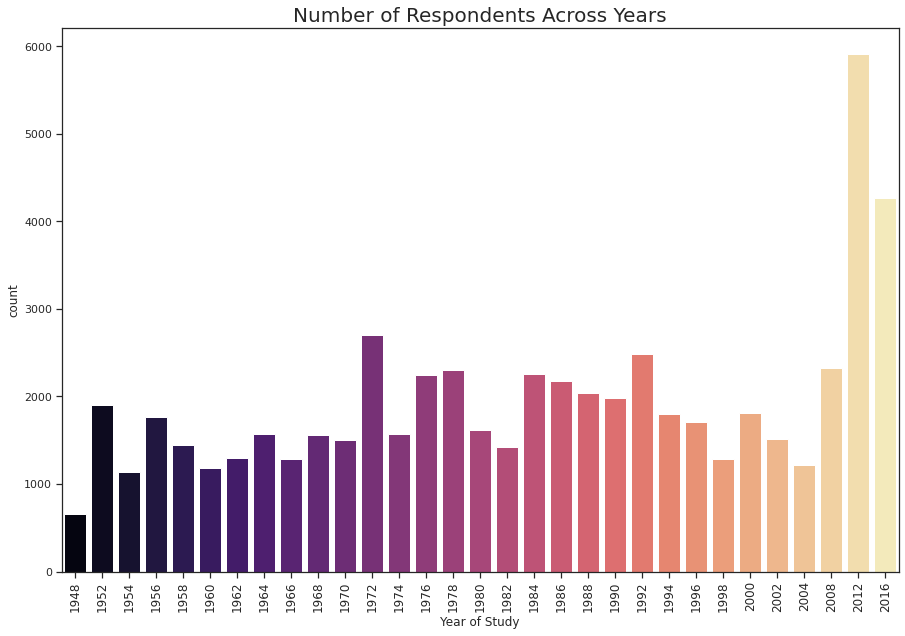

In [6]:
# show count of respondents across years
sns.countplot(x='VCF0004', data=dataset, palette='magma')
plt.title('Number of Respondents Across Years', size=20)
plt.xticks(size=12, rotation=90)
plt.xlabel('Year of Study')

plt.show()

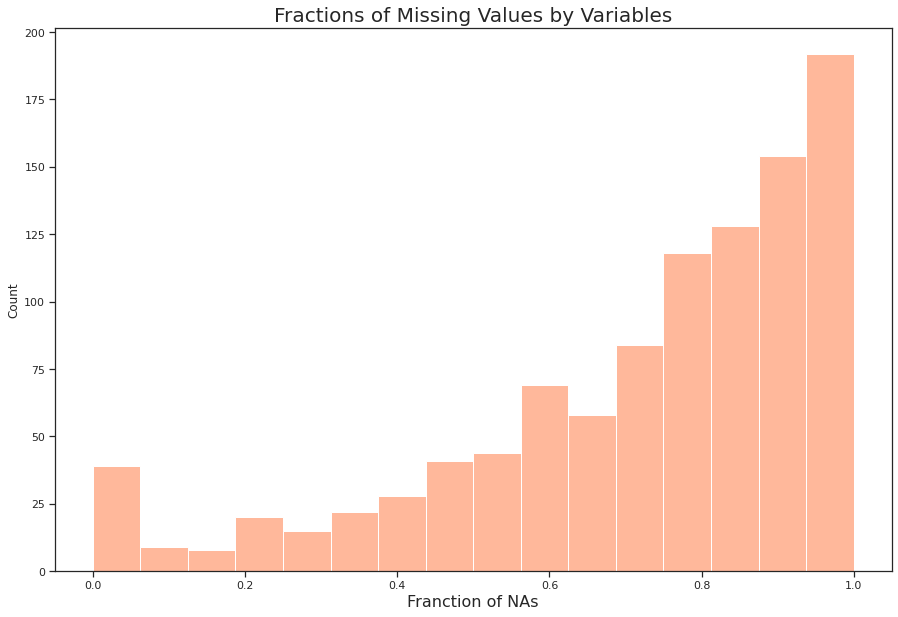

In [7]:
# calculate ratio of missing values in all variables
df_plot = dataset.isna().mean().reset_index()
sns.histplot(data=df_plot, x=0, color='lightsalmon')
plt.title('Fractions of Missing Values by Variables', size=20)
plt.xlabel('Franction of NAs', fontsize=16)

plt.show()

Our main variable of interest is VCF0102, which indicates the Age Groups in the data. Moreover, we are particularly interested in the young voters who belong to Age Group "17-24". 

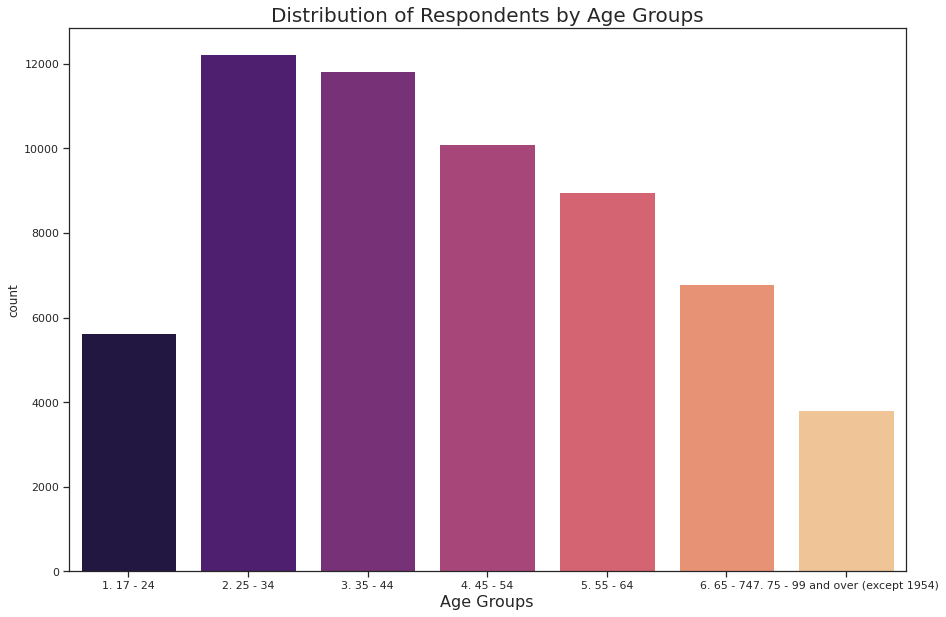

In [8]:
# show number of respondents by Age Groups
sns.countplot(x='VCF0102', data=dataset, palette='magma')
plt.xlabel('Age Groups', size=16)
plt.title('Distribution of Respondents by Age Groups', size=20)

plt.show()

Election happens every 4 years, therefore we will group our data into space of 4 starting in 1952. We want to focus on how young voters are engaged on election day. 

In [9]:
election_years=np.arange(1952,2020,4,dtype=int)
election_years

array([1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012, 2016])

In [10]:
# By young voters we focus on responders with age less than 25.
# subset the dataset to focus on the age group "17-24" and results collected during election years
newdf = dataset.loc[dataset['VCF0102']=='1. 17 - 24']
newdf = newdf.loc[newdf['VCF0004'].isin(election_years)]
newdf.shape

(3563, 1029)

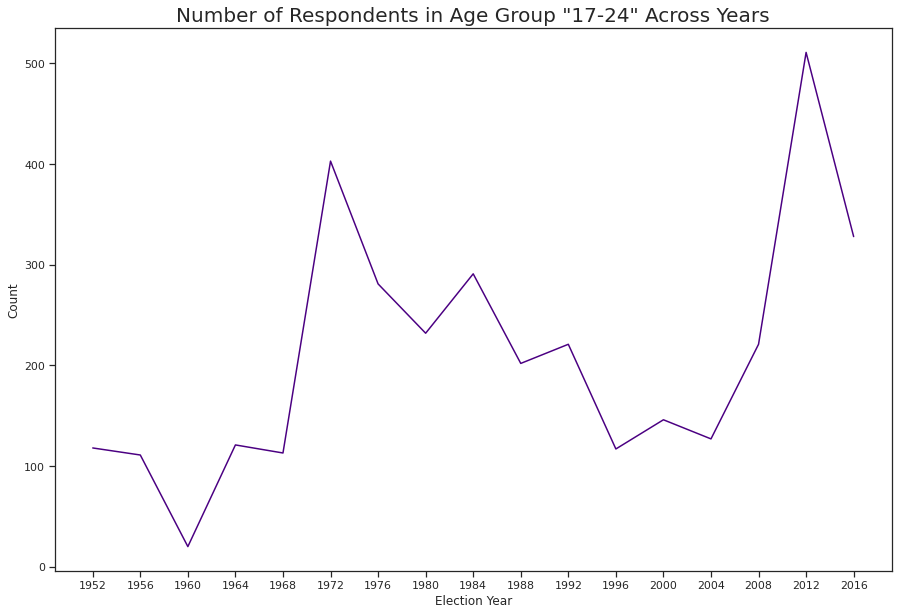

In [11]:
# number of respondents in Age Group '17-24' across years
df_plot = newdf.groupby(['VCF0004']).size().reset_index()

sns.lineplot(data=df_plot, x='VCF0004', y=0, color='indigo')
plt.title('Number of Respondents in Age Group "17-24" Across Years', size=20)
plt.xlabel('Election Year')
plt.ylabel('Count')
plt.xticks(labels=df_plot['VCF0004'],ticks=df_plot['VCF0004'])

plt.show()

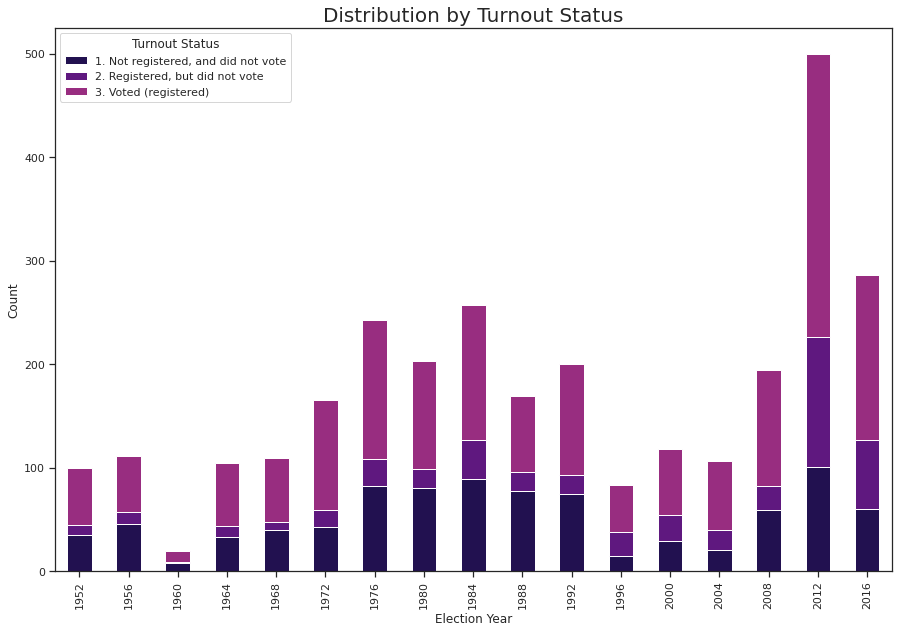

In [12]:
# distribution by turnout status
df_plot = newdf.groupby(['VCF0004','VCF0703']).size().reset_index().pivot(columns='VCF0703', index='VCF0004', values =0)

df_plot.plot(kind='bar', stacked=True)
plt.title('Distribution by Turnout Status', size=20)
plt.xlabel('Election Year')
plt.ylabel('Count')
plt.legend(title='Turnout Status')

plt.show()

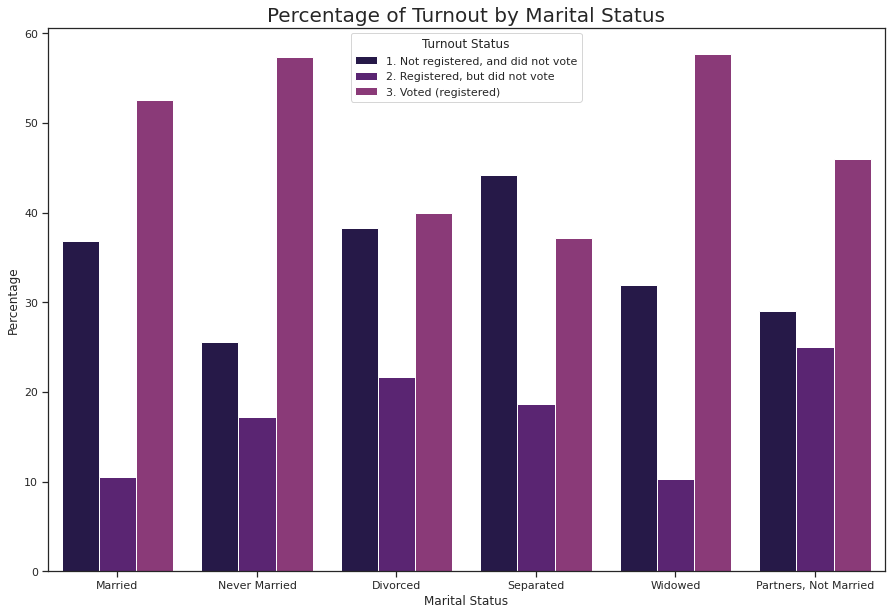

In [17]:
# percentage of turnout status by marital status
df_plot = newdf.groupby(['VCF0147', 'VCF0703']).size()
df_plot = df_plot.groupby(level=0).apply(lambda x:100*x/float(x.sum())).reset_index()

# construct graph
sns.barplot(data=df_plot, x='VCF0147', y=0, hue='VCF0703')
plt.title('Percentage of Turnout by Marital Status', size=20)
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Turnout Status')
plt.xticks(np.arange(6),labels=['Married','Never Married','Divorced','Separated','Widowed','Partners, Not Married'])
# show graph
plt.show()

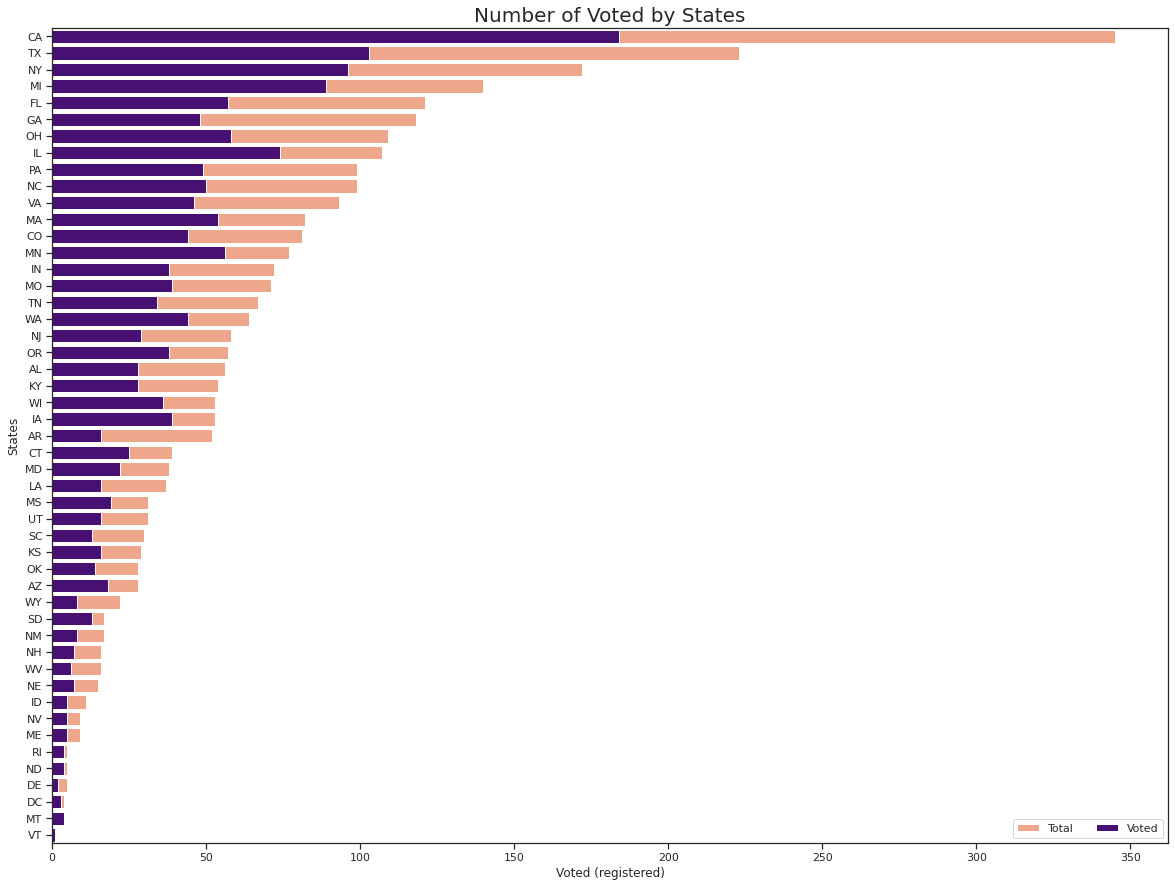

In [18]:
# number of voted by states
df_plot = newdf.groupby(['VCF0901b','VCF0703']).size().reset_index()
df_plot = df_plot.pivot_table(columns='VCF0703', index='VCF0901b', values =0, aggfunc='sum', margins=True).reset_index()
df_plot = df_plot.sort_values(by='All', ascending=False).reset_index().drop(df_plot.index[0])

# construct graph
f, ax = plt.subplots(figsize = (20,15))
sns.barplot(data=df_plot, x='All', y='VCF0901b', label='Total', color='lightsalmon')
sns.barplot(data=df_plot, x='3. Voted (registered)', y='VCF0901b', label='Voted',color='indigo')
plt.title('Number of Voted by States', size=20)
plt.xlabel('Voted (registered)')
plt.ylabel('States')
ax.legend(ncol = 2, loc = 'lower right')
# show graph
plt.show()

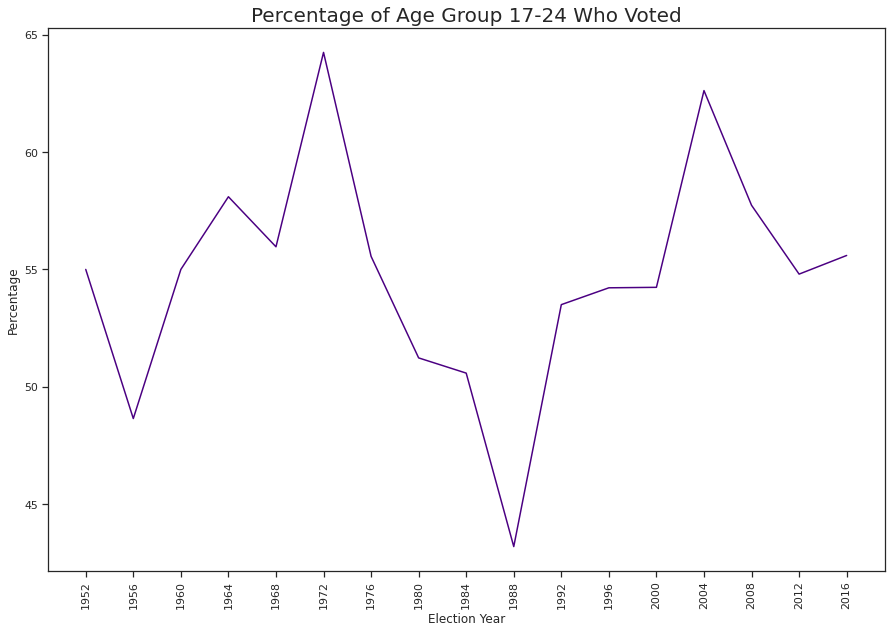

In [19]:
# percentage of voted across years
df_plot = newdf.groupby(['VCF0004','VCF0703']).size()
df_plot = df_plot.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()
df_plot = df_plot.loc[df_plot['VCF0703']=='3. Voted (registered)'].reset_index()

# construct graph
sns.lineplot(data=df_plot, x='VCF0004', y=0, color='indigo')
plt.title('Percentage of Age Group 17-24 Who Voted', size=20)
plt.xticks(labels=df_plot['VCF0004'],ticks=df_plot['VCF0004'], rotation=90)
plt.xlabel('Election Year')
plt.ylabel('Percentage')
# show graph
plt.show()

filter dataset to focus on those who voted. When we usually think that male voters are more active than female voters, historical data shows that it's actually opposite of what we expected. 

In [48]:
# filter dataset to include only those who voted in Age Group 17-24
newdf_voted = newdf[newdf['VCF0703'] == '3. Voted (registered)']
newdf_voted.shape

(1618, 1029)

In [49]:
# summary by genders
newdf_voted.groupby(['VCF0104']).size().reset_index().rename(columns={0:'count'})

,VCF0104,count
0,1. Male,740
1,2. Female,877
2,3. Other (2016),1


In [50]:
# since '3. Other(2016)' is only applicable to Year 2016 and only has 1 data point, it's immaterial and we can drop this category.
newdf_voted = newdf_voted[newdf_voted.VCF0104 != '3. Other (2016)']
# remove unused category, leaving only 'male' and 'female'
newdf_voted['VCF0104'] = newdf_voted['VCF0104'].cat.remove_unused_categories()
# display dimension of new dataset
newdf_voted.shape

(1617, 1029)

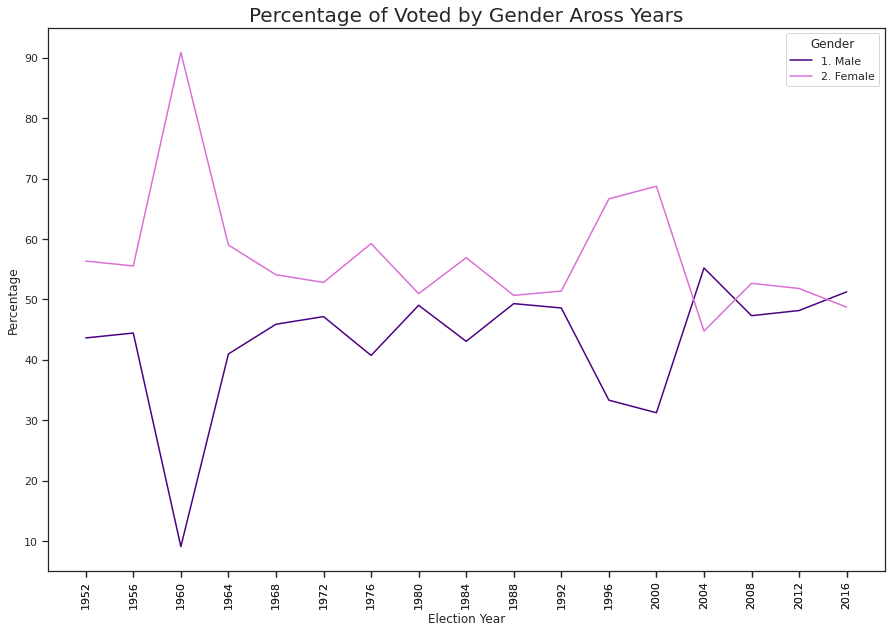

In [51]:
# gender distribution among those who voted
df_plot = newdf_voted.groupby(['VCF0004','VCF0104']).size()
df_plot = df_plot.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()

# construct graph
sns.lineplot(data=df_plot, x='VCF0004', y=0, hue='VCF0104', palette={'1. Male':'indigo', '2. Female':'orchid'})
plt.title('Percentage of Voted by Gender Aross Years', size=20)
plt.xticks(labels=df_plot['VCF0004'],ticks=df_plot['VCF0004'], rotation=90)
plt.xlabel('Election Year')
plt.ylabel('Percentage')
plt.legend(title='Gender')
# show graph
plt.show()

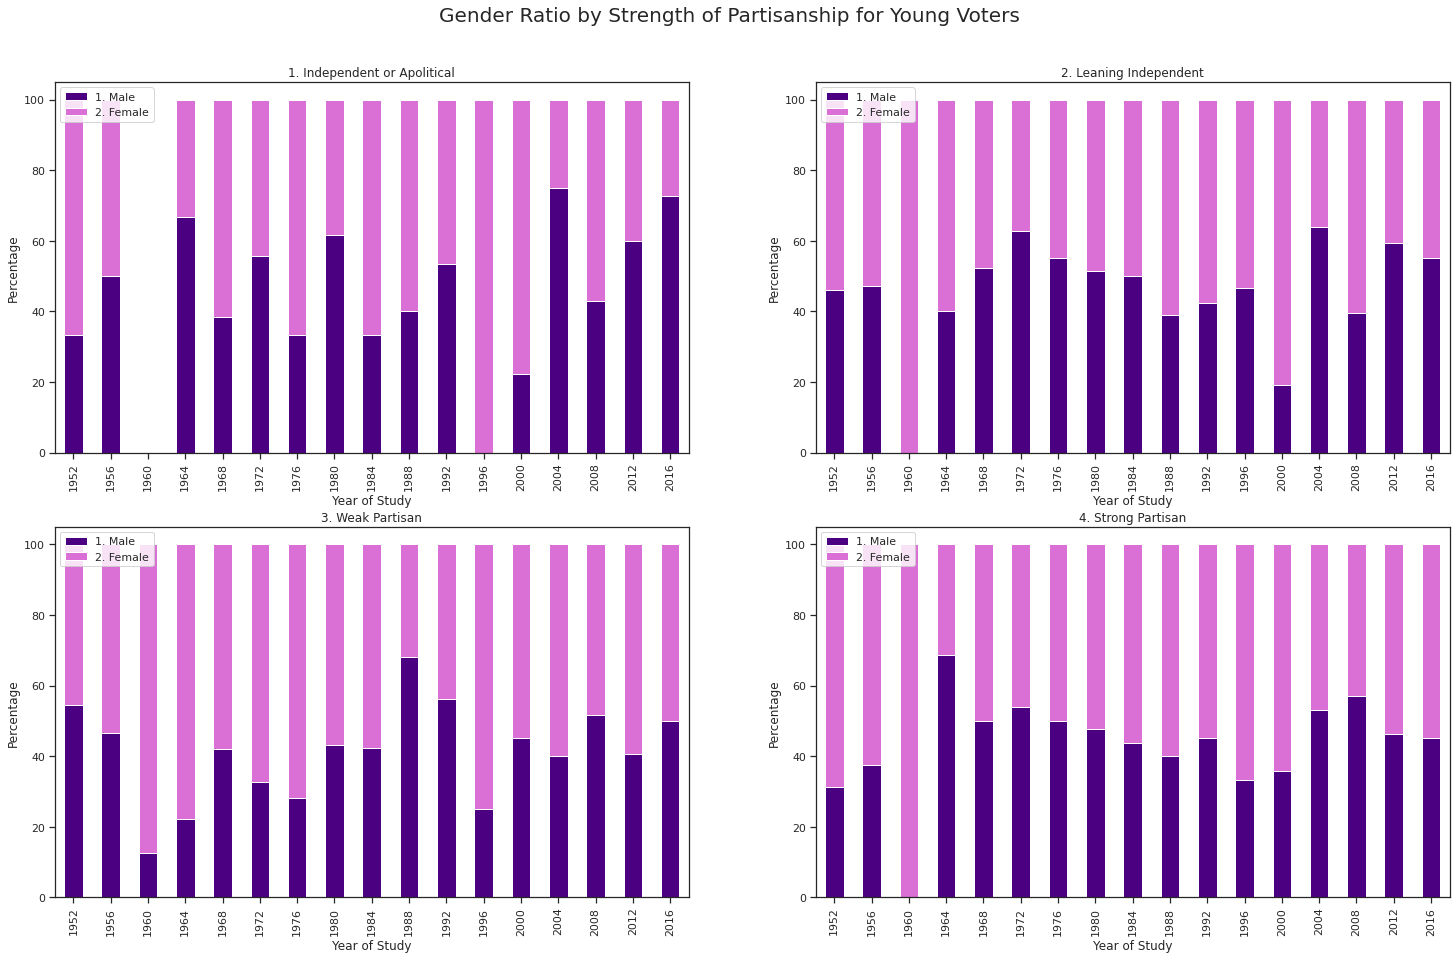

In [57]:
# view by voted: year, gender, and Strength of Partisanship by barplot facetgrid
df_plot = newdf_voted.groupby(['VCF0004','VCF0305','VCF0104']).size()
df_plot = df_plot.groupby(level=(0,1)).apply(lambda x: 100*x / float(x.sum())).reset_index()

# setting up subplots
fig, axs = plt.subplots(2, 2, figsize=(25,15))
fig.suptitle('Gender Ratio by Strength of Partisanship for Young Voters', y=0.95, size=20)
partisanship = df_plot['VCF0305'].unique().tolist()

# generate a graph for each strength of partisanship
for VCF0305, ax in zip(partisanship, axs.flat):
    plotdf = df_plot[df_plot.VCF0305==VCF0305].drop('VCF0305', axis=1).pivot(index='VCF0004', columns='VCF0104', values=0)
    plotdf.plot(kind='bar', stacked=True, xlabel='Year of Study', ylabel='Percentage', ax=ax, title=VCF0305, color={'1. Male':'indigo', '2. Female':'orchid'})
    ax.legend(loc='upper left')

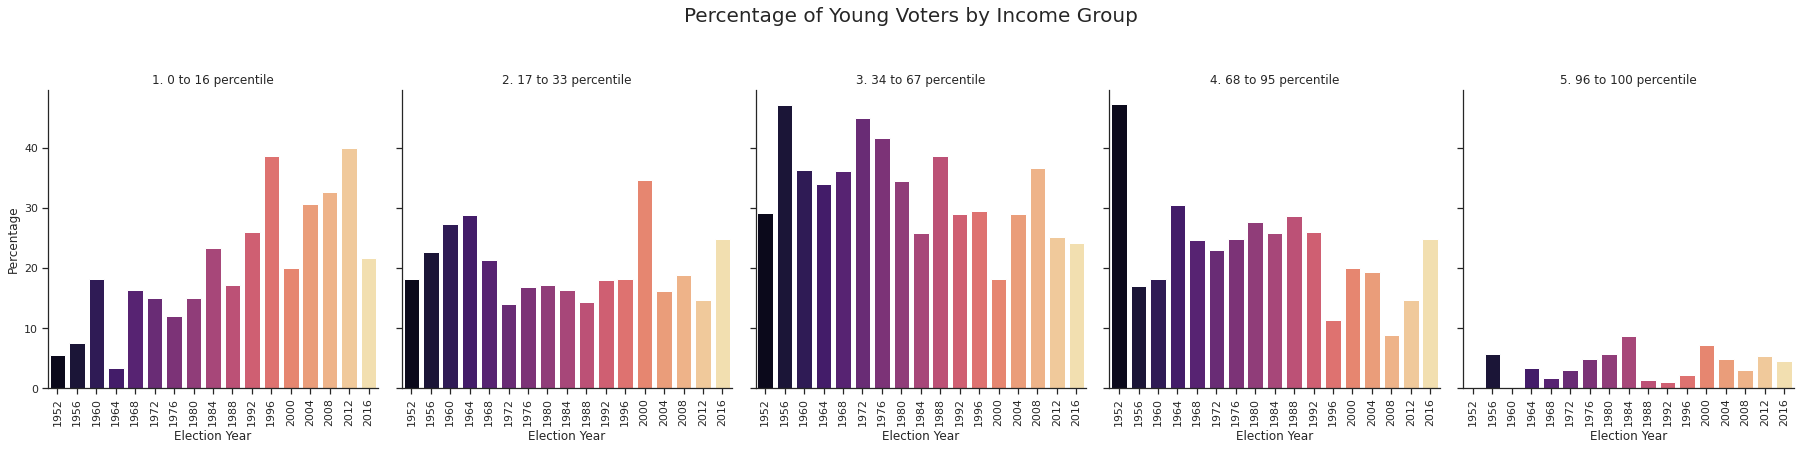

In [96]:
# income distribution among those who voted
df_plot = newdf_voted.groupby(['VCF0004','VCF0114']).size()
df_plot = df_plot.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()

# construct graph
g = sns.catplot(data=df_plot, x='VCF0004', y=0, col='VCF0114', kind='bar', palette='magma', height=5, aspect=1)
g.fig.suptitle('Percentage of Young Voters by Income Group', y=1.15, size=20)
g.set_xlabels('Election Year')
g.set_ylabels('Percentage')
g.set_xticklabels(rotation=90)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
#show graph
plt.show()

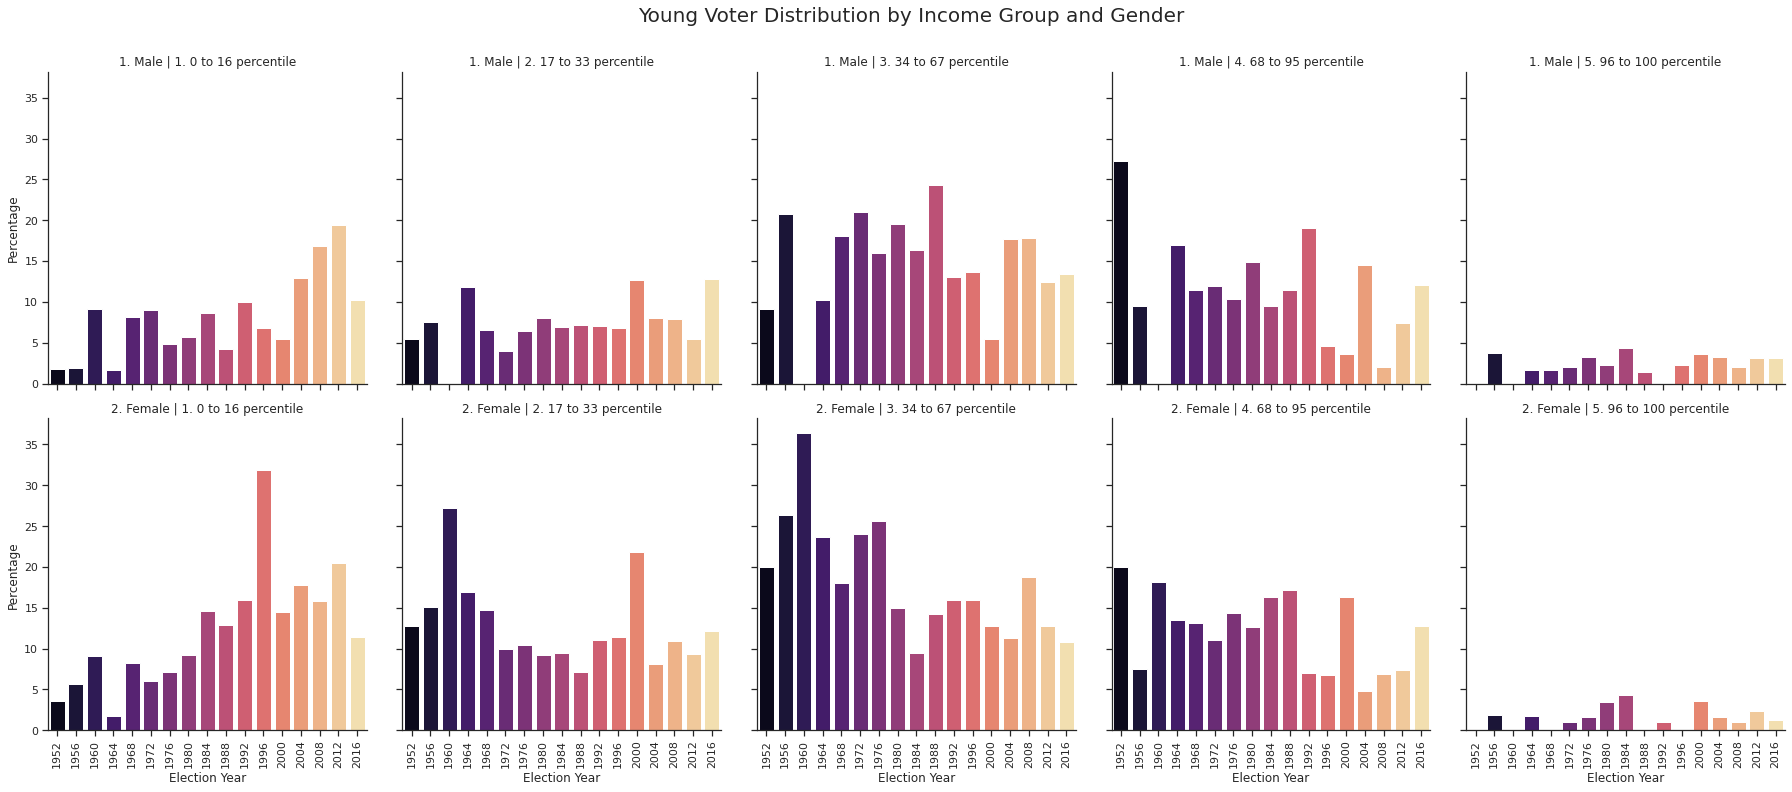

In [95]:
# Young Voter Distribution by income group and gender
df_plot = newdf_voted.groupby(['VCF0004','VCF0114','VCF0104']).size()
df_plot = df_plot.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()

# construct graph
g = sns.catplot(data=df_plot, x='VCF0004', y=0, row='VCF0104', col='VCF0114', kind='bar', height=5, aspect=1, palette='magma')
g.fig.suptitle('Young Voter Distribution by Income Group and Gender', y=1.05, size=20)
g.set_xlabels('Election Year')
g.set_ylabels('Percentage')
g.set_xticklabels(rotation=90)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
#show graph
plt.show()

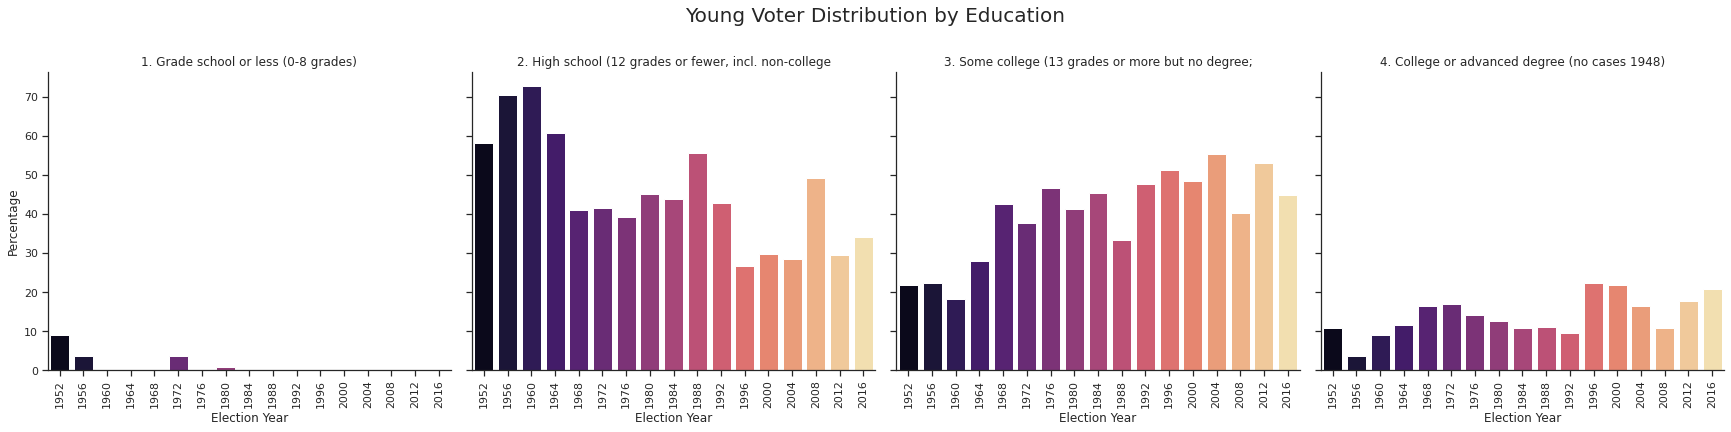

In [94]:
# view by voted: year and education by barplot facetgrid
df_plot = newdf_voted.groupby(['VCF0004','VCF0110']).size()
df_plot = df_plot.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()

# construct graph
g = sns.catplot(data=df_plot, x='VCF0004', y=0, col='VCF0110', kind='bar', palette='magma', height=5, aspect=1.2)
g.fig.suptitle('Young Voter Distribution by Education', y=1.1, size=20)
g.set_xlabels('Election Year')
g.set_ylabels('Percentage')
g.set_xticklabels(rotation=90)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
# show graph
plt.show()

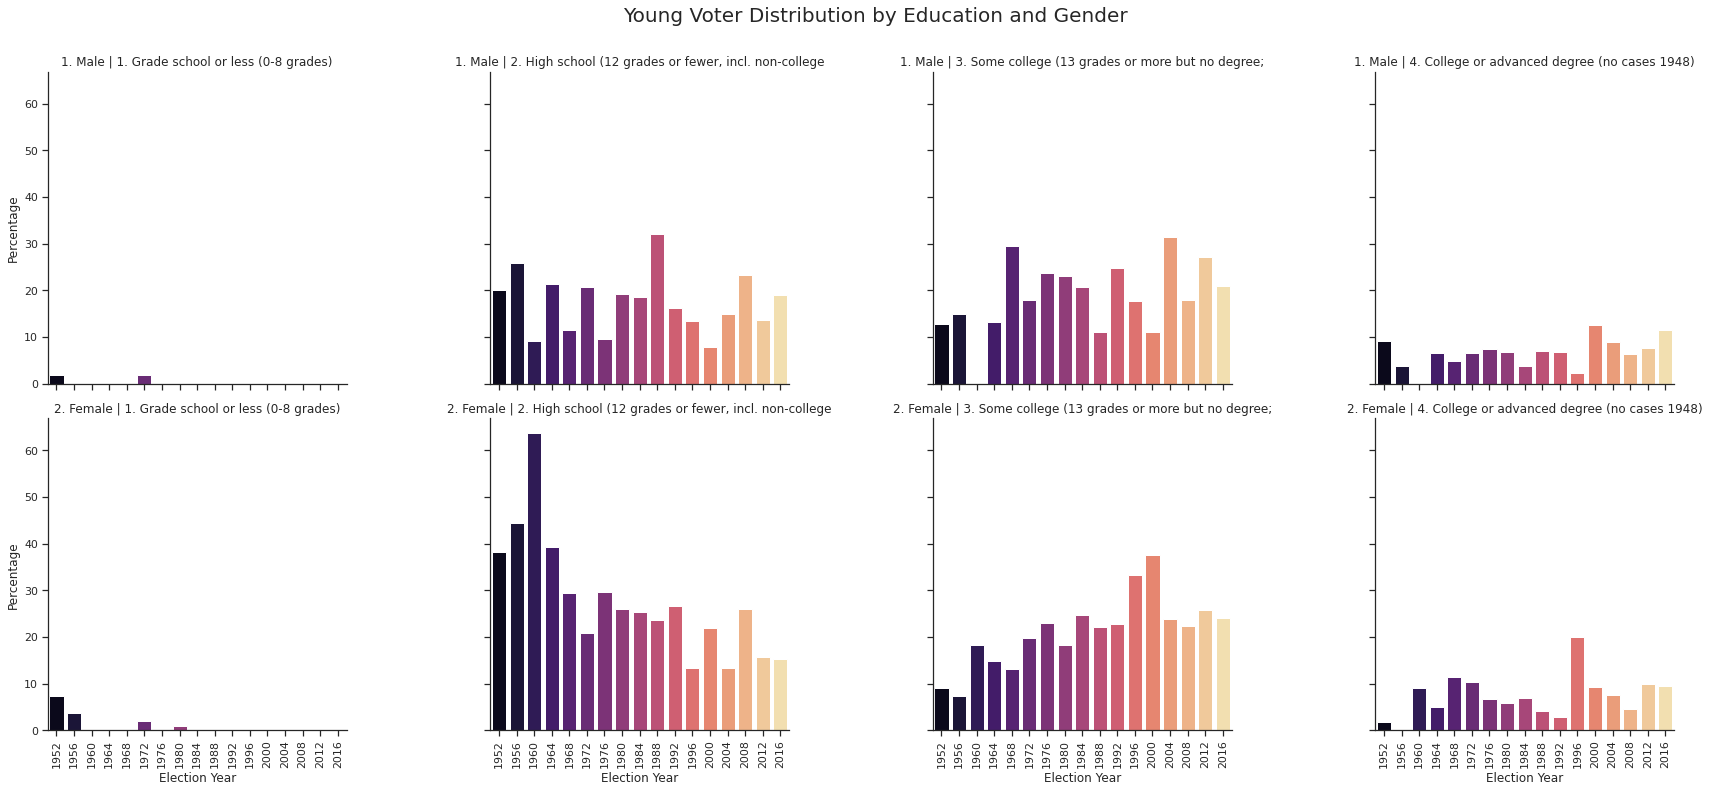

In [93]:
# view by voted: year, gender, and education by barplot facetgrid
df_plot = newdf_voted.groupby(['VCF0004','VCF0110','VCF0104']).size()
df_plot = df_plot.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()

# construct graph
g = sns.catplot(data=df_plot, x='VCF0004', y=0, row='VCF0104', col='VCF0110', kind='bar', height=5, aspect=1.2, palette='magma')
g.fig.suptitle('Young Voter Distribution by Education and Gender', y=1.05, size=20)
g.set_xlabels('Election Year')
g.set_ylabels('Percentage')
g.set_xticklabels(rotation=90)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
# show graph
plt.show()

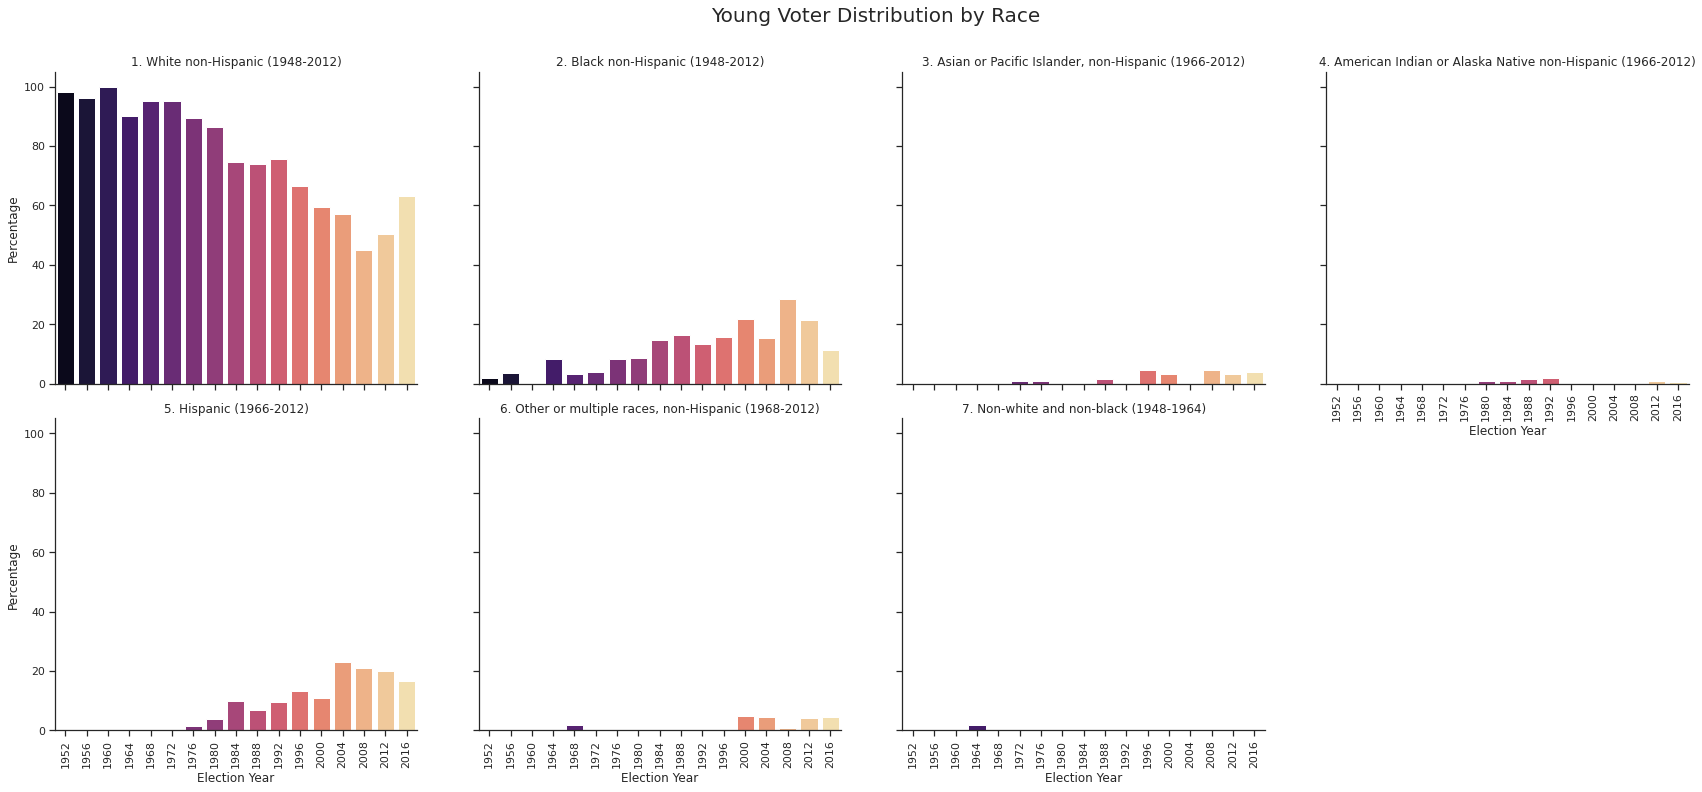

In [92]:
# view by voted: year and race by barplot facetgrid

df_plot = newdf_voted.groupby(['VCF0004','VCF0105a']).size()
df_plot = df_plot.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()

# construct graph
g = sns.catplot(data=df_plot, x='VCF0004', y=0, col='VCF0105a', col_wrap=4, kind='bar', palette='magma', height=5, aspect=1.2)
g.fig.suptitle('Young Voter Distribution by Race', y=1.05, size=20)
g.set_xlabels('Election Year')
g.set_ylabels('Percentage')
g.set_xticklabels(rotation=90)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
# show graph
plt.show()

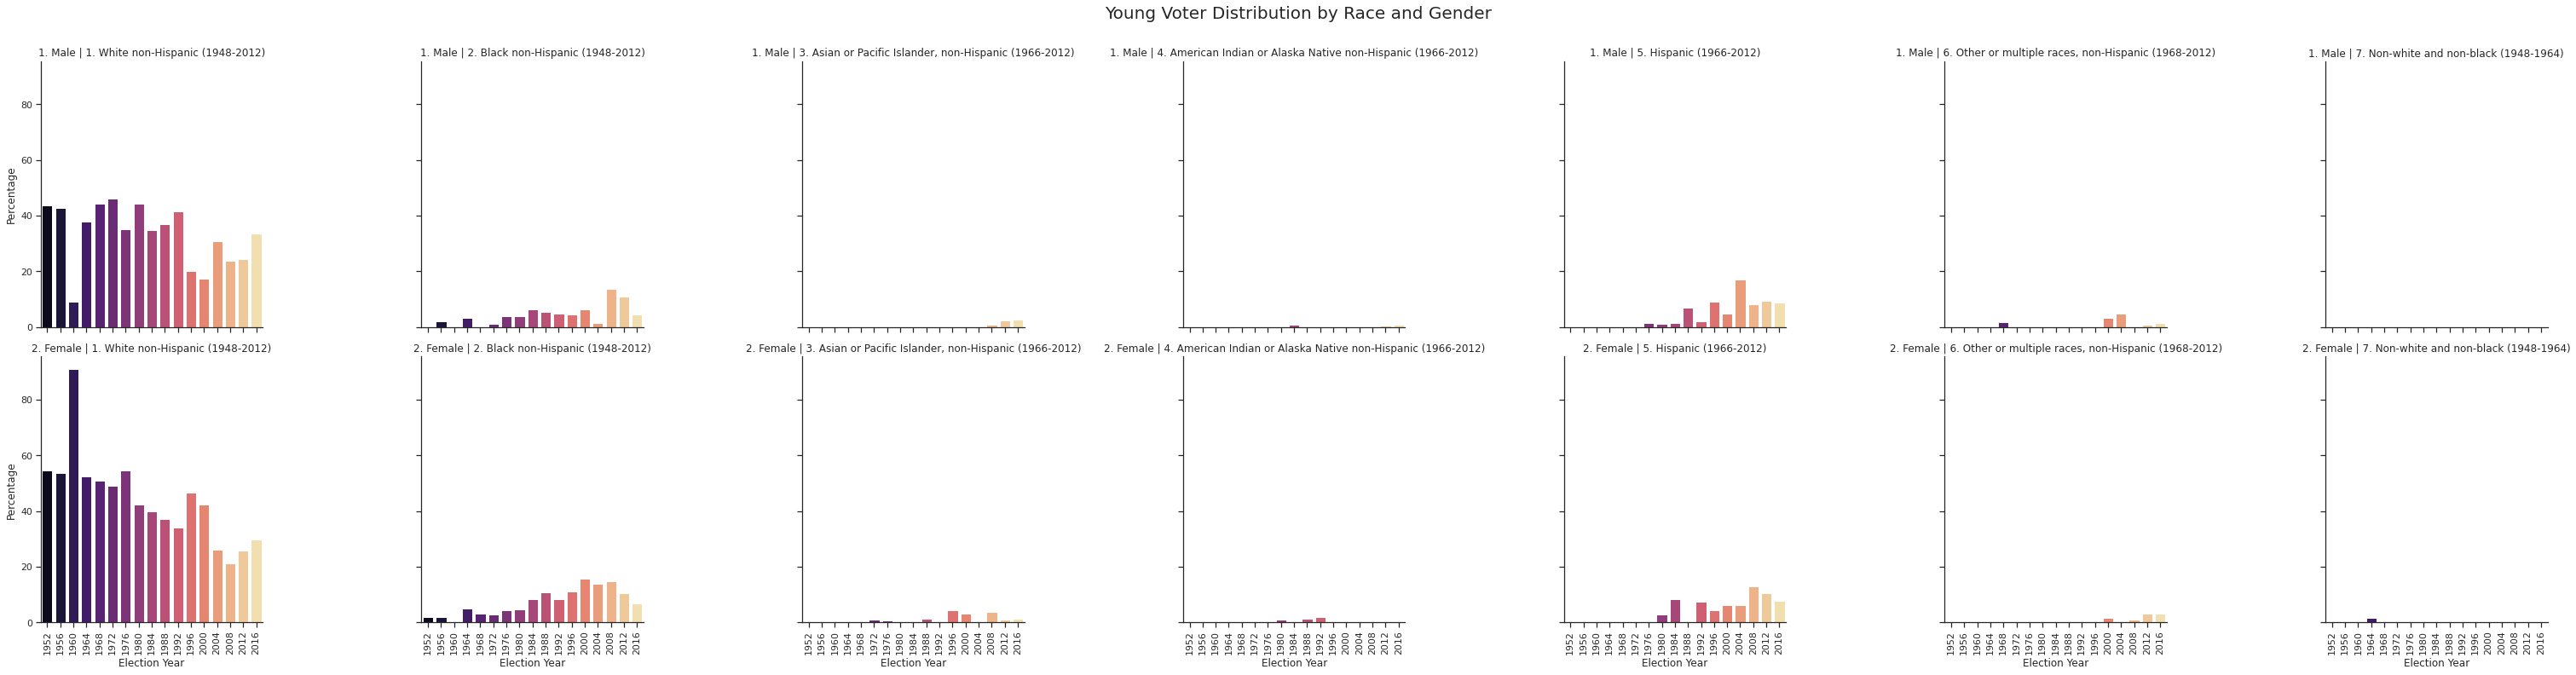

In [100]:
# view by voted: year, gender, and race by barplot facetgrid
df_plot = newdf_voted.groupby(['VCF0004','VCF0105a','VCF0104']).size()
df_plot = df_plot.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()

# construct graph
g = sns.catplot(data=df_plot, x='VCF0004', y=0, row='VCF0104', col='VCF0105a', kind='bar', height=5, aspect=1.2, palette='magma')
g.fig.suptitle('Young Voter Distribution by Race and Gender', y=1.05, size=20)
g.set_xlabels('Election Year')
g.set_ylabels('Percentage')
g.set_xticklabels(rotation=90)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
# show graph
plt.show()

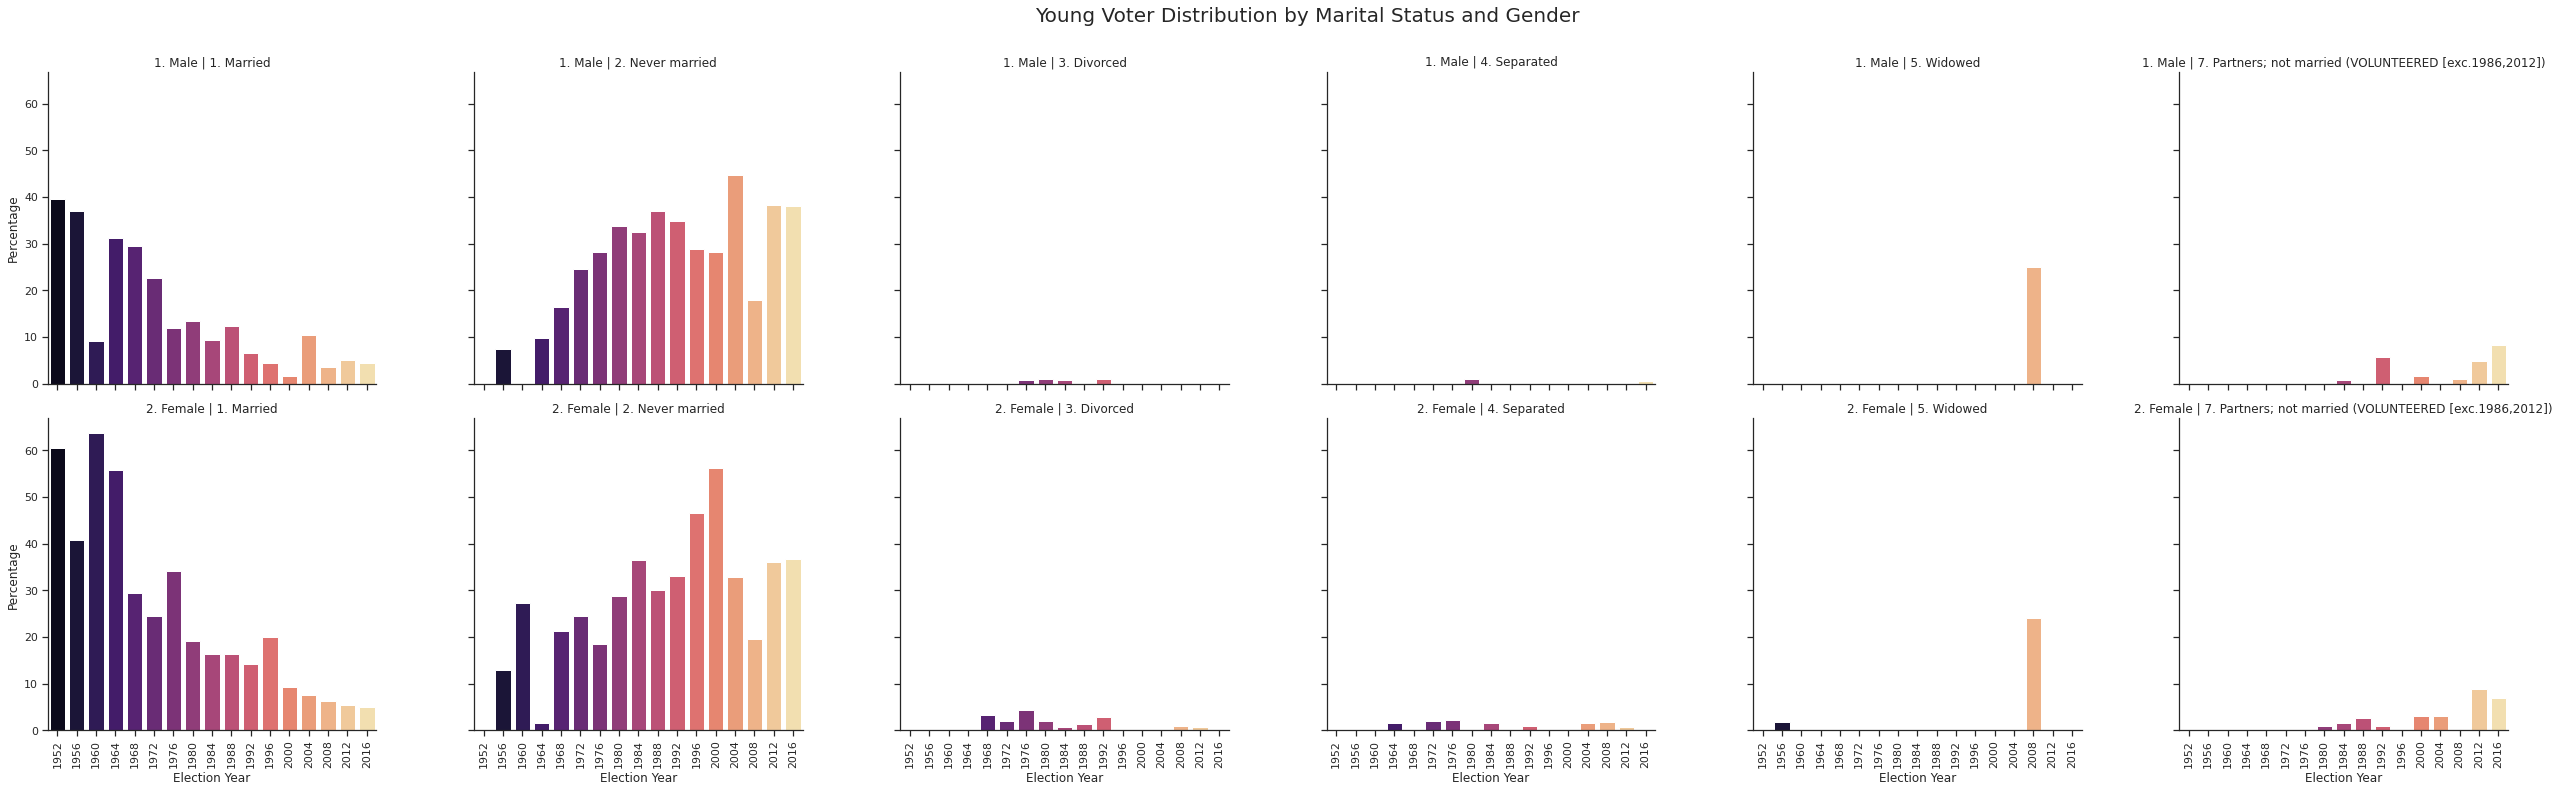

In [101]:
# view by voted: year, gender, and marital status by barplot facetgrid
df_plot = newdf_voted.groupby(['VCF0004','VCF0147','VCF0104']).size()
df_plot = df_plot.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()

# construct graph
g = sns.catplot(data=df_plot, x='VCF0004', y=0, row='VCF0104', col='VCF0147', kind='bar', height=5, aspect=1.2, palette='magma')
g.fig.suptitle('Young Voter Distribution by Marital Status and Gender', y=1.05, size=20)
g.set_xlabels('Election Year')
g.set_ylabels('Percentage')
g.set_xticklabels(rotation=90)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
# show graph
plt.show()

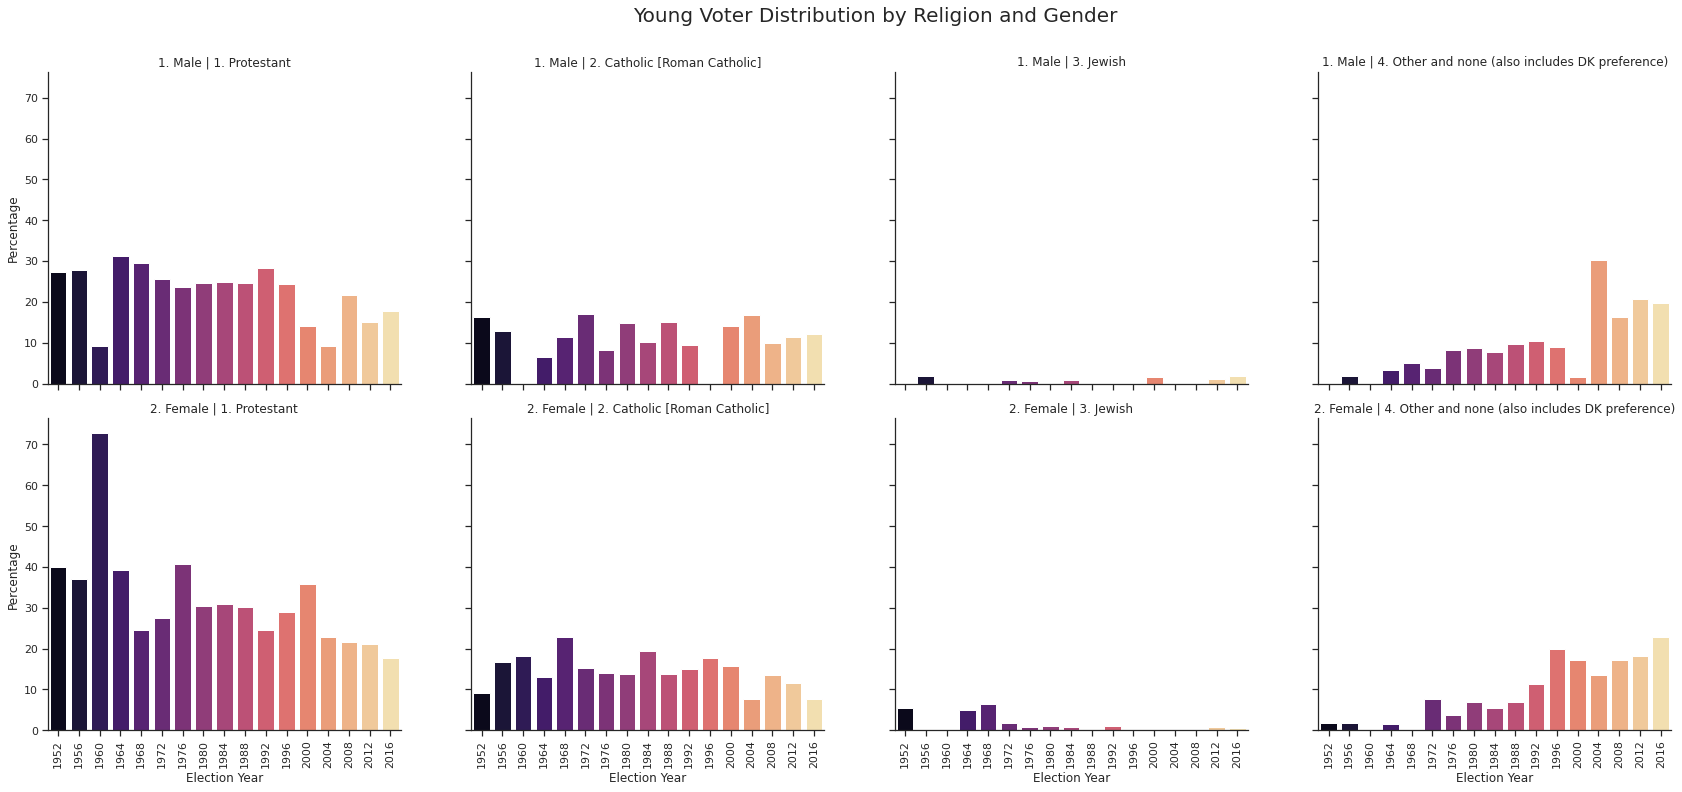

In [105]:
# view by voted: year, gender, and religion by barplot facetgrid
df_plot = newdf_voted.groupby(['VCF0004','VCF0128','VCF0104']).size()
df_plot = df_plot.groupby(level=0).apply(lambda x: 100*x / float(x.sum())).reset_index()

# construct graph
g = sns.catplot(data=df_plot, x='VCF0004', y=0, row='VCF0104', col='VCF0128', kind='bar', height=5, aspect=1.2, palette='magma')
g.fig.suptitle('Young Voter Distribution by Religion and Gender', y=1.05, size=20)
g.set_xlabels('Election Year')
g.set_ylabels('Percentage')
g.set_xticklabels(rotation=90)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
# show graph
plt.show()

This dataset contains total of 1029 variables. The following list has variables of interest in our study.

- VCF0004 [Year of Study]
- VCF0703 [Turnout]
- VCF0105a [Race]
- VCF0104 [Gender]
- VCF0102 [Age Group]
- VCF0110 [Education]
- VCF0128 [Religion]
- VCF0305 [Strength of Partisanship]
- VCF0901b [State Postal Abbrev]
- VCF0017 [Mode of Interview]
- VCF0114 [Respondent Family - Income Group]
- VCF0147 [Marital Status]